### Random Sample Imputation

#### Aim: Random sample imputation consist of taking random observation from the dataset and we use this observation to replace the nan values.

#### When to use it?
It assumes that data point are missing completely at random

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dataset/titanic_train.csv', usecols=['Age', 'Survived', 'Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [5]:
df.shape

(891, 3)

In [6]:
# first drop the NaN value from the Age column
# out of the non-NaN values create samples as much as the null values.
# inside the samples you can define the number of samples required.
# in our case we have defined the number inside the sample equal to the number of NaN values.

df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [1]:
def impute_nan(df, variable, median):
    df[variable+'_median'] = df[variable].fillna(median) #fill all nan values with median of the age column
    df[variable+'_random'] = df[variable]
    
    #it will have random sample to fill the nan values
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    #replace with a random value at the "INDEX", where it is null.
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random']=random_sample

In [8]:
median = df.Age.median()
median

28.0

In [9]:
impute_nan(df,'Age',median)

In [10]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

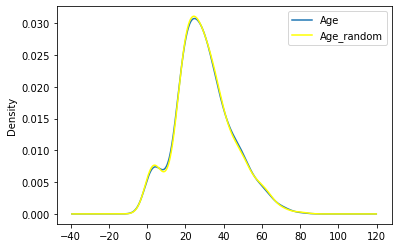

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['Age'].plot(kind='kde', ax=ax)
df.Age_random.plot(kind='kde', ax=ax, color='yellow')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')